# Project_02: Investigate a Dataset - A broad analysis about movies from TMDb

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this analysis a movie dataset from the TMDb will be investigated using the concept of the data analysis workflow learnd in the Data Analyst Nanodegree Program on Udacity. The data include roughly 10.000 movies including user ratings, costs and also revenue. The release years start from 1961 up to 2015.
Some basic questions to ask are summarized beneath.
>
> When looking through the data one quickly realizes that it isn't quite fair to compare moview from over 50 years ago with movies only 10 years old, since inflation infected the worth of 1$ a lot in the last 50 years. For this, two columns that got adjusted by the inflation were created and usd as a basis for economic comparison.

**Questions to ask:**
1.  Which movies & genres are most popular from year to year?
2.  How did the costs, revenues and profits (inflation adjusted) changed over the years?
3.  What kinds of properties are associated with movies that have high revenues?
4.  Have older movies in general had better profit margins compared to newer ones?
5.  Which factors influence the popularity of single movies the most? 
6. Within a year, are there a specific months, where movies tend to be more popular? (correlation, yeartime to popularity)
7. At which times, most movies are released? (year-wise and month-wise)

In [1]:
#import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

**General ideas and first insights:** <br>
Info: to check, if all planned tasks are done, a **DONE** will be added at the end of the respective tasks.

1. drop duplicates **DONE**
2. IDs as imdb_IDs not included into analysis, but kept for tracking reasons. sort to the end of the list. maybe to be deleted later **DONE**
3. Formats:
    * release_date // release_year --> Check if year from release_date differs from release_year! --> keep both: release_year for question 1; release_date for question 7. **DONE**
    * release_date cut away year,day --> just month needed. --> create: release_month **DONE**
    * change revenue_adj; cost_adj to int64 **DONE**
4. unnessecary columns: 
    * homepage --> no necessary information to solve questions. **DONE**
    * tagline  --> no necessary information to solve questions. **DONE**
    * overview --> no necessary information to solve questions. **DONE**
    * budget   --> we're using the adjusted version instead. **DONE**
    * revenue  --> we're using the adjusted version instead. **DONE**
    * imdb_id  --> no necessary information to solve questions. **DONE**
    * id       --> no necessary information to solve questions.  **DONE**
5. missing values:
    * cast     --> drop rows without cast. **DONE**
    * homepage --> not needed, as column will get deleted. **DONE**
    * director --> drop rows without director. **DONE**
    * tagline  --> not needed, as column will get deleted. **DONE**
    * keywords --> leave as it is, since keywords are not mandatory. --> put "unknown" where NaN **DONE**
    * overview --> not needed, as column will get deleted. **DONE**
    * genres   --> drop rows without genre. **DONE**
    * production_companies --> drop rows without production company. **DONE**
    * revenue_adj, budget_adj --> fill in mean **DONE**

### General Properties

In [2]:
# Loading data and do first rough checks (missing values, general infos and description)
df = pd.read_csv('tmdb-movies.csv')
df.head(5)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.shape

(10866, 21)

### Data Cleaning

In [6]:
# going through the points described in the "Data Wrangling" Chapter step by step:
# 1) drop duplicates:
#check for duplicates:
df.duplicated().sum()

#drop duplicates:
df.drop_duplicates(inplace=True)

#recheck for duplicates:
df.duplicated().sum()

0

In [7]:
# 2) sort ID columns to the end of the list for convenience:

columns = list(df.columns.values)
columns.pop(columns.index('id'))
columns.pop(columns.index('imdb_id'))

df = df[columns + ['id','imdb_id']]
df.head()

,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,id,imdb_id
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,135397,tt0369610
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,76341,tt1392190
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,262500,tt2908446
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,140607,tt2488496
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,168259,tt2820852


In [8]:
# 3) Format -->  Check if year from release_date differs from release_year! --> compare both dates
#--> keep both: release_year for question 1; release_date for question 7.

year_errors = (df['release_date'].str[-2:] == df['release_year'].astype(str).str[-2:])
year_errors.value_counts()

# we see that there are only "True" values which means that there are no differences between release_date year and release_year

True    10865
dtype: int64

In [9]:
# 3) change release_year from object to datetime and cut away year --> just day/month format.
# we do not loose data here, since we already proofed that the "year" information is in another column and the same as in the release_date column.
# we split the release_date on the "/" to answer question #7 later (for this we need only months and no years, days!)
release_month=[]

rel_date = df['release_date'].str.split("/")

for row in rel_date:
    if len(row[0]) > 1 and len(row[1]) > 1:
        release_month.append(row[0])
        
    if len(row[0]) <= 1 and len(row[1]) > 1:
        release_month.append("0"+row[0])

    if len(row[0]) <= 1 and len(row[1]) <= 1:
        release_month.append("0"+row[0])
        
    if len(row[0]) > 1 and len(row[1]) <= 1:
        release_month.append(row[0])

df['release_month'] = release_month
df['release_month'] = df['release_month'].astype(int)
df['release_month'].head(5)

0     6
1     5
2     3
3    12
4     4
Name: release_month, dtype: int64

In [10]:
#3 change revenue_adj; cost_adj to int64
df['revenue_adj'] = df['revenue_adj'].astype(int)
df['budget_adj'] = df['budget_adj'].astype(int)
df.head()

,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,id,imdb_id,release_month
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,...,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939,1392445892,135397,tt0369610,6
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,...,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939,348161292,76341,tt1392190,5
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,...,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955,271619025,262500,tt2908446,3
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,...,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919,1902723129,140607,tt2488496,12
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,...,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799923,1385748801,168259,tt2820852,4


In [11]:
#4) . unnessecary columns
df.drop(['homepage', 'tagline','overview', 'budget','revenue', 'id','imdb_id'], axis=1, inplace=True)
df.head()

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939,1392445892,6
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939,348161292,5
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955,271619025,3
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919,1902723129,12
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799923,1385748801,4


In [12]:
#5) missing values:

df['keywords'] = df['keywords'].fillna("unknown")

# check for nulls in budget / revenue adjusted and replace by mean - not perfect, but works.
df['revenue_adj'] = df.revenue_adj.mask(df.revenue_adj == 0, df.revenue_adj.mean())
df['budget_adj'] = df.budget_adj.mask(df.budget_adj == 0, df.budget_adj.mean())

#df[df['cast'].isna()]
df.dropna(inplace=True) # drop nulls /Nans

df['budget_adj'] = df['budget_adj'].astype(int)
df['revenue_adj'] = df['revenue_adj'].astype(int)

#check for clean data
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 15 columns):
popularity              9772 non-null float64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
keywords                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null object
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
budget_adj              9772 non-null int64
revenue_adj             9772 non-null int64
release_month           9772 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis


<a id='Question1'></a>
### Research Question 1: Which movies & genres are most popular from year to year?

3 variables -->  genres, year, popularity

In [13]:
#find idx, where popularity is max.
df.groupby('release_year').popularity.idxmax().head()

release_year
1960    10141
1961    10110
1962     9849
1963    10438
1964     9881
Name: popularity, dtype: int64

In [14]:
#select exactly those rows per year.
pop_genres = df.loc[df.groupby('release_year').popularity.idxmax()]

In [15]:
pop_genres.genres.apply(lambda x: pd.value_counts(x.split("|"))).sum(axis=0)

Horror              3.0
Drama              14.0
Thriller           20.0
Comedy              6.0
Adventure          31.0
Family             11.0
Animation           8.0
Action             28.0
Mystery             3.0
Science Fiction    20.0
Crime               7.0
Music               2.0
Fantasy            10.0
Romance             3.0
dtype: float64

#### Answering RESEARCH QUESTION 1: 
Below we see, which genres have been most popular each year. Drama, Horror, Action Adventure and Thriller lead the list of popularity.

In [16]:
pop_genres.head(5)

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
10141,2.610362,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960,5949601,235934958,8
10110,2.631987,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,puppy|animation|dog|dalmatian,79,Adventure|Animation|Comedy|Family,Walt Disney Productions,1/25/61,913,6.6,1961,29179444,1574814739,1
9849,3.170651,Dr. No,Sean Connery|Ursula Andress|Joseph Wiseman|Jac...,Terence Young,london|england|assassination|spy|casino,110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),10/4/62,560,6.7,1962,7929293,429623553,10
10438,2.508235,From Russia With Love,Sean Connery|Daniela Bianchi|Lotte Lenya|Rober...,Terence Young,venice|london|terror|england|assassination,115,Action|Thriller|Adventure,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,10/11/63,458,6.7,1963,17800448,561773358,10
9881,3.153791,Goldfinger,Sean Connery|Honor Blackman|Gert FrÃ¶be|Shirle...,Guy Hamilton,secret organization|secret intelligence servic...,110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),9/17/64,602,7.0,1964,24605935,878080399,9


In [17]:
pop_genres.genres.str.split("|")

10141                            [Drama, Horror, Thriller]
10110               [Adventure, Animation, Comedy, Family]
9849                         [Adventure, Action, Thriller]
10438                        [Action, Thriller, Adventure]
9881                         [Adventure, Action, Thriller]
10689                        [Adventure, Action, Thriller]
10820                          [Animation, Family, Comedy]
10398                       [Family, Animation, Adventure]
9719                 [Science Fiction, Mystery, Adventure]
10724                        [Adventure, Action, Thriller]
10648               [Animation, Comedy, Family, Adventure]
9923                              [Science Fiction, Drama]
7269                                        [Drama, Crime]
10593                                  [Animation, Family]
9758                                        [Drama, Crime]
9805                                               [Drama]
10173                                       [Crime, Dram

<a id='Question2'></a>
### Research Question 2  How did the costs, revenues and profits (inflation adjusted) changed over the years?

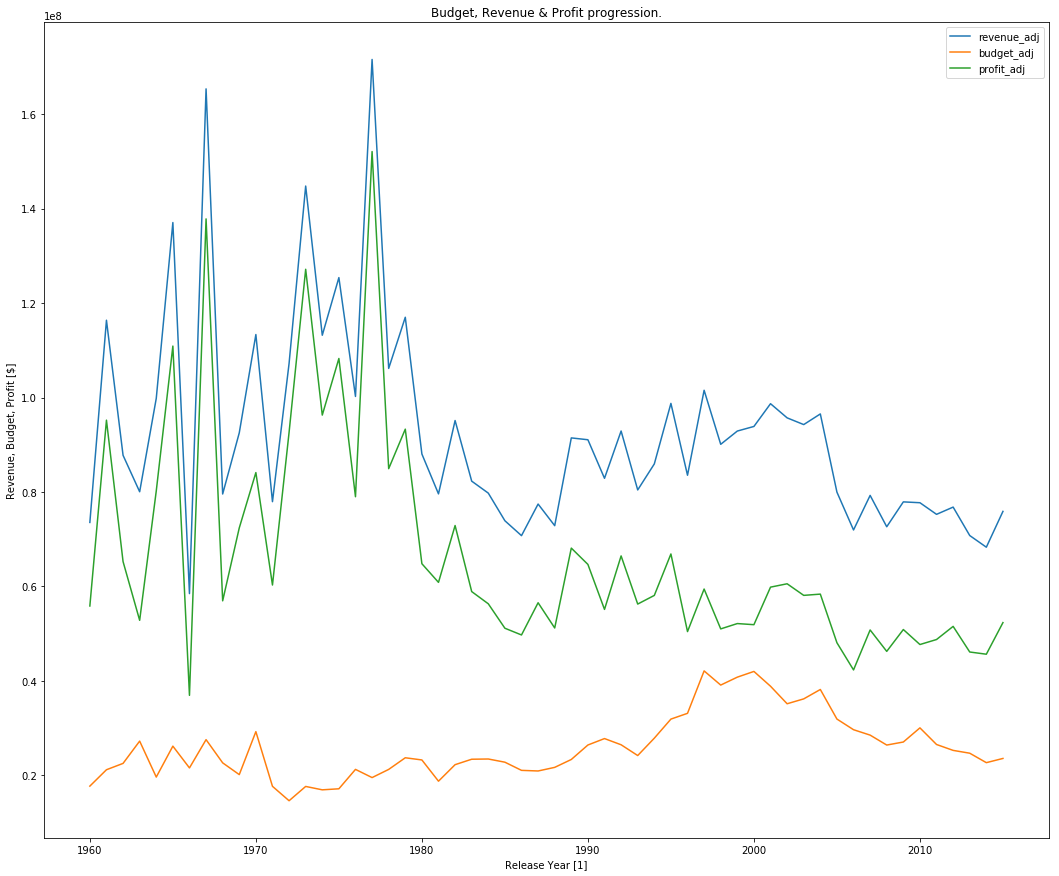

In [18]:
#look at mean of costs & revenues of each year. first add a column "Profits"
df['profit_adj']=(df.revenue_adj - df.budget_adj).astype(int)

df.groupby('release_year').revenue_adj.mean().astype(int).plot(figsize=(18,15), kind='line')
df.groupby('release_year').budget_adj.mean().plot( kind='line');
df.groupby('release_year').profit_adj.mean().plot( kind='line');
plt.xlabel('Release Year [1]')
plt.ylabel('Revenue, Budget, Profit [$]')
plt.legend();
plt.title("Budget, Revenue & Profit progression.");

#### EXPLANATION & INSIGHTS:
Need to smoothen the output, to better visualize and understand the insights, see next cell.

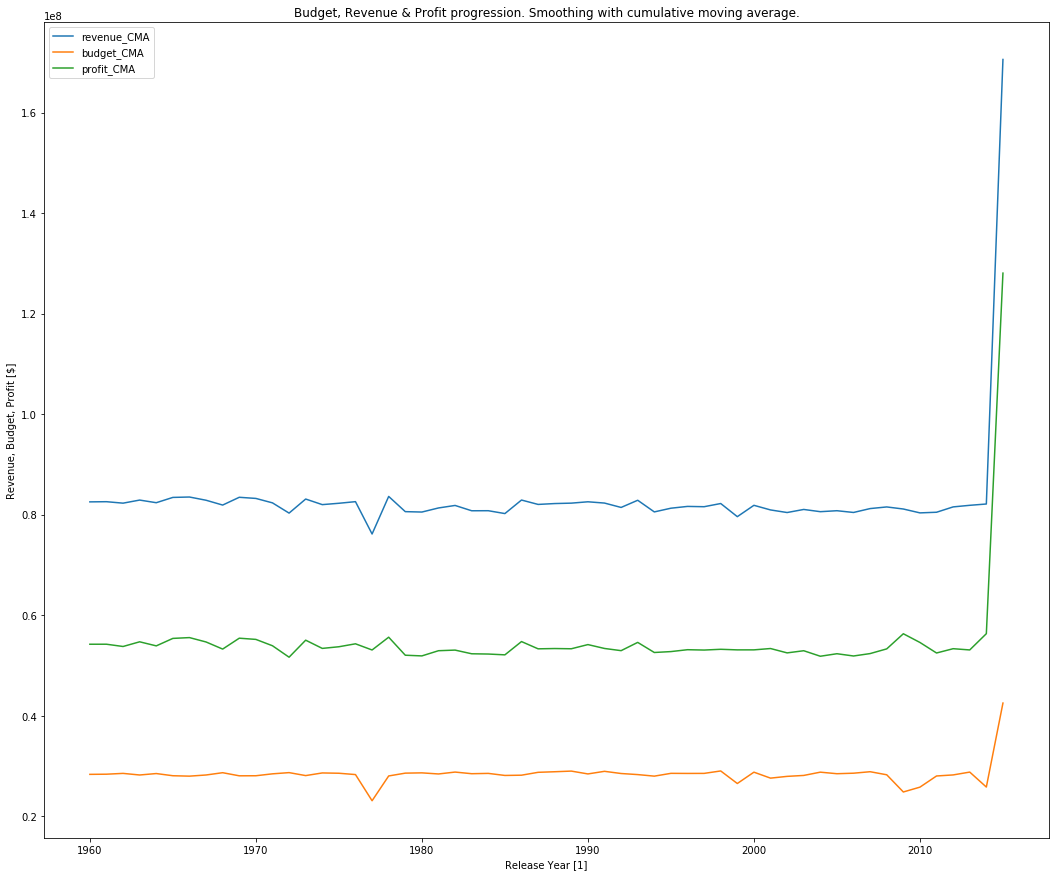

In [19]:
#cumulative moving averae --> CMA

df['revenue_CMA'] = df.revenue_adj.expanding(min_periods=1).mean().astype(int)
df['budget_CMA'] = df.budget_adj.expanding(min_periods=1).mean().astype(int)
df['profit_CMA'] = df.profit_adj.expanding(min_periods=1).mean().astype(int)

#df.head(20)
#df.groupby('release_year').revenue_adj.mean().astype(int).plot(figsize=(18,15), kind='line')
df.groupby('release_year').revenue_CMA.mean().astype(int).plot(figsize=(18,15), kind='line');
df.groupby('release_year').budget_CMA.mean().plot( kind='line');
df.groupby('release_year').profit_CMA.mean().plot( kind='line');
plt.xlabel('Release Year [1]')
plt.ylabel('Revenue, Budget, Profit [$]')
plt.title("Budget, Revenue & Profit progression. Smoothing with cumulative moving average.");
plt.legend();

#### EXPLANATION & INSIGHTS:
this approximation seems to flatten out everything so it will also not be used for further investigations.

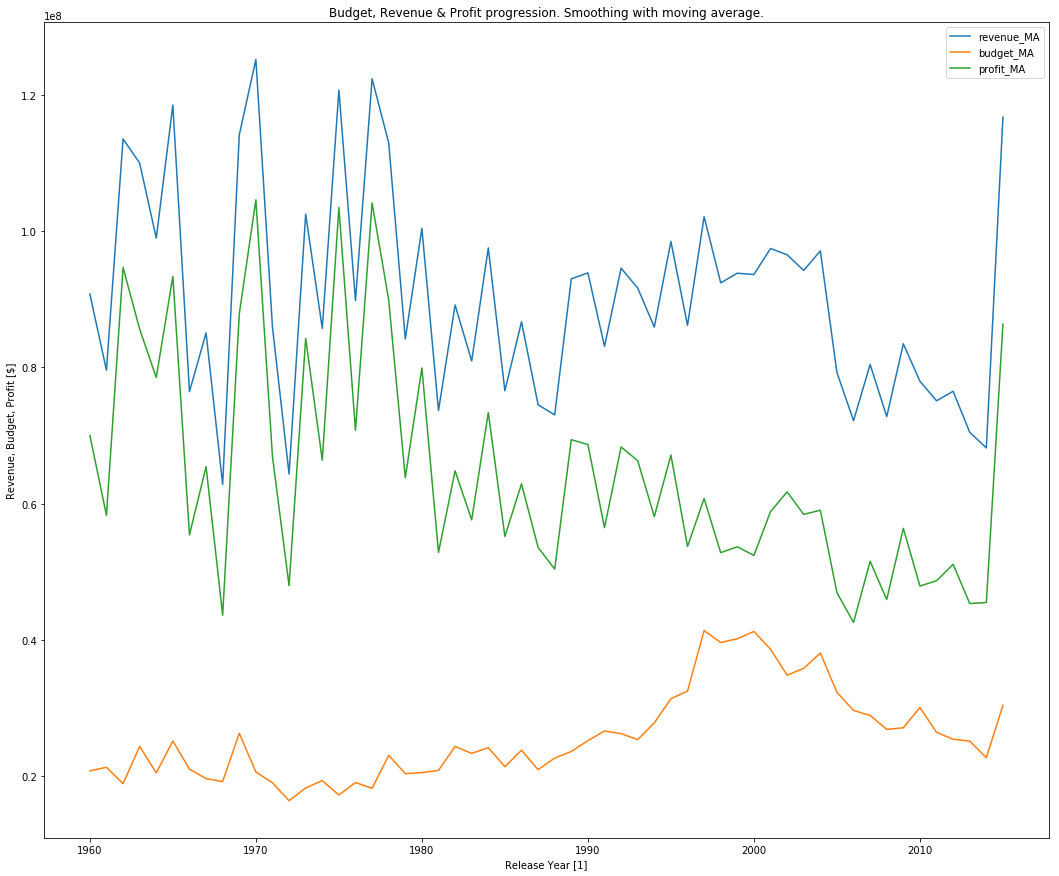

In [20]:
#smoothen outputs with moving average, trying different approximations: (MA = Moving Average)

df['revenue_MA'] = df.revenue_adj.rolling(window=80, min_periods=1).mean().astype(int)
df['budget_MA'] = df.budget_adj.rolling(window=80, min_periods=1).mean().astype(int)
df['profit_MA'] = df.profit_adj.rolling(window=80, min_periods=1).mean().astype(int)

#df.head(20)
#df.groupby('release_year').revenue_adj.mean().astype(int).plot(figsize=(18,15), kind='line')
df.groupby('release_year').revenue_MA.mean().astype(int).plot(figsize=(18,15), kind='line');
df.groupby('release_year').budget_MA.mean().plot( kind='line');
df.groupby('release_year').profit_MA.mean().plot( kind='line');
plt.legend();
plt.xlabel('Release Year [1]')
plt.ylabel('Revenue, Budget, Profit [$]')
plt.title("Budget, Revenue & Profit progression. Smoothing with moving average.");

#### EXPLANATION & INSIGHTS:
this approximation also does not seem to make anything better.I searched for other methods but didn't manage to get better results, so I worked with the graph without smoothing. (see next cell)

release_year
1977    152090423
Name: profit_adj, dtype: int64

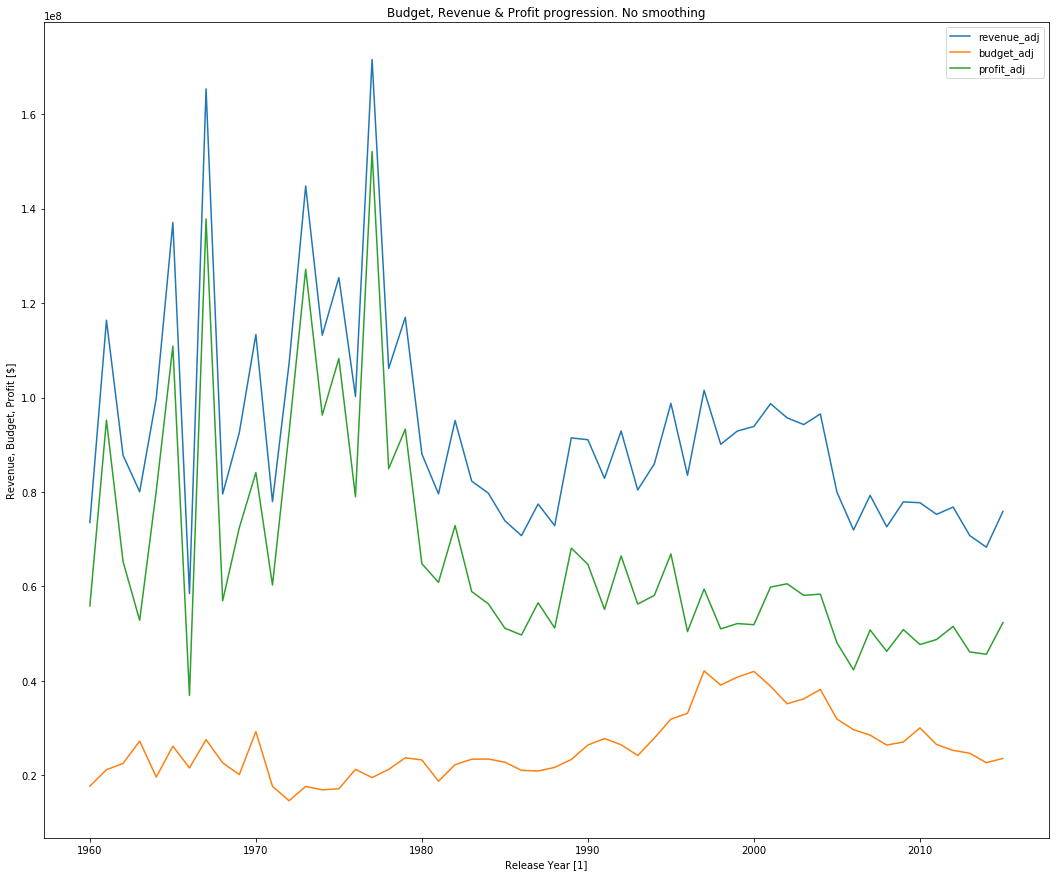

In [21]:
df.groupby('release_year').revenue_adj.mean().astype(int).plot(figsize=(18,15), kind='line')
df.groupby('release_year').budget_adj.mean().plot( kind='line');
df.groupby('release_year').profit_adj.mean().plot( kind='line');
plt.legend();
plt.xlabel('Release Year [1]')
plt.ylabel('Revenue, Budget, Profit [$]')
plt.title("Budget, Revenue & Profit progression. No smoothing");

#EXPLANATION & INSIGHTS:
# ANSWERING RESEARCH QUESTION 2: 
# Revenue: revenues spread was higher in earlier days - probably because the whole industry was not as big in those days and outliers in over or underperformance were more often to occur.
# Budget: movie-budgets increase around 1995 with its peak in 1997 with a mean of 42096421$. This is mainly through the movie StarWars.
# Profit: between 1960 and 1978, profits have been higher on average compared to the time after 1978 with its peak in 1977 with 152090423$ mean.
# Overall: # in ~2002 we see a strong decrese in revenue, budget and also profit, which could be correlated to 911 and the fear of people going into crowded places like cinemas.

#observations to answer questions above
max_mean_budget = df.groupby('release_year').budget_adj.mean().astype(int)
max_mean_budget.max()
max_mean_budget[max_mean_budget==42096421]

max_mean_profit = df.groupby('release_year').profit_adj.mean().astype(int)
max_mean_profit.max()
max_mean_profit[max_mean_profit==152090423]

#### EXPLANATION & INSIGHTS: ANSWERING RESEARCH QUESTION 2: 
* Revenue: revenues spread was higher in earlier days - probably because the whole industry was not as big in those days and outliers in over or underperformance were more often to occur.
* Budget: movie-budgets increase around 1995 with its peak in 1997 with a mean of 42096421 dollars. This is mainly through the movie StarWars.
* Profit: between 1960 and 1978, profits have been higher on average compared to the time after 1978 with its peak in 1977 with 152090423$ mean.
* Overall: in ~2002 we see a strong decrese in revenue, budget and also profit, which could be correlated to 9/11 and the fear of people going into crowded places like cinemas.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 22 columns):
popularity              9772 non-null float64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
keywords                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null object
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
budget_adj              9772 non-null int64
revenue_adj             9772 non-null int64
release_month           9772 non-null int64
profit_adj              9772 non-null int64
revenue_CMA             9772 non-null int64
budget_CMA              9772 non-null int64
profit_CMA              9772 non-null int64
revenue_MA              9772 non-null int64
b

<a id='Question3and4'></a>
### Research Question 3:  What kinds of properties are associated with movies that have high revenues?


### Research Question 4.  Have older movies in general had better profit margins compared to newer ones?


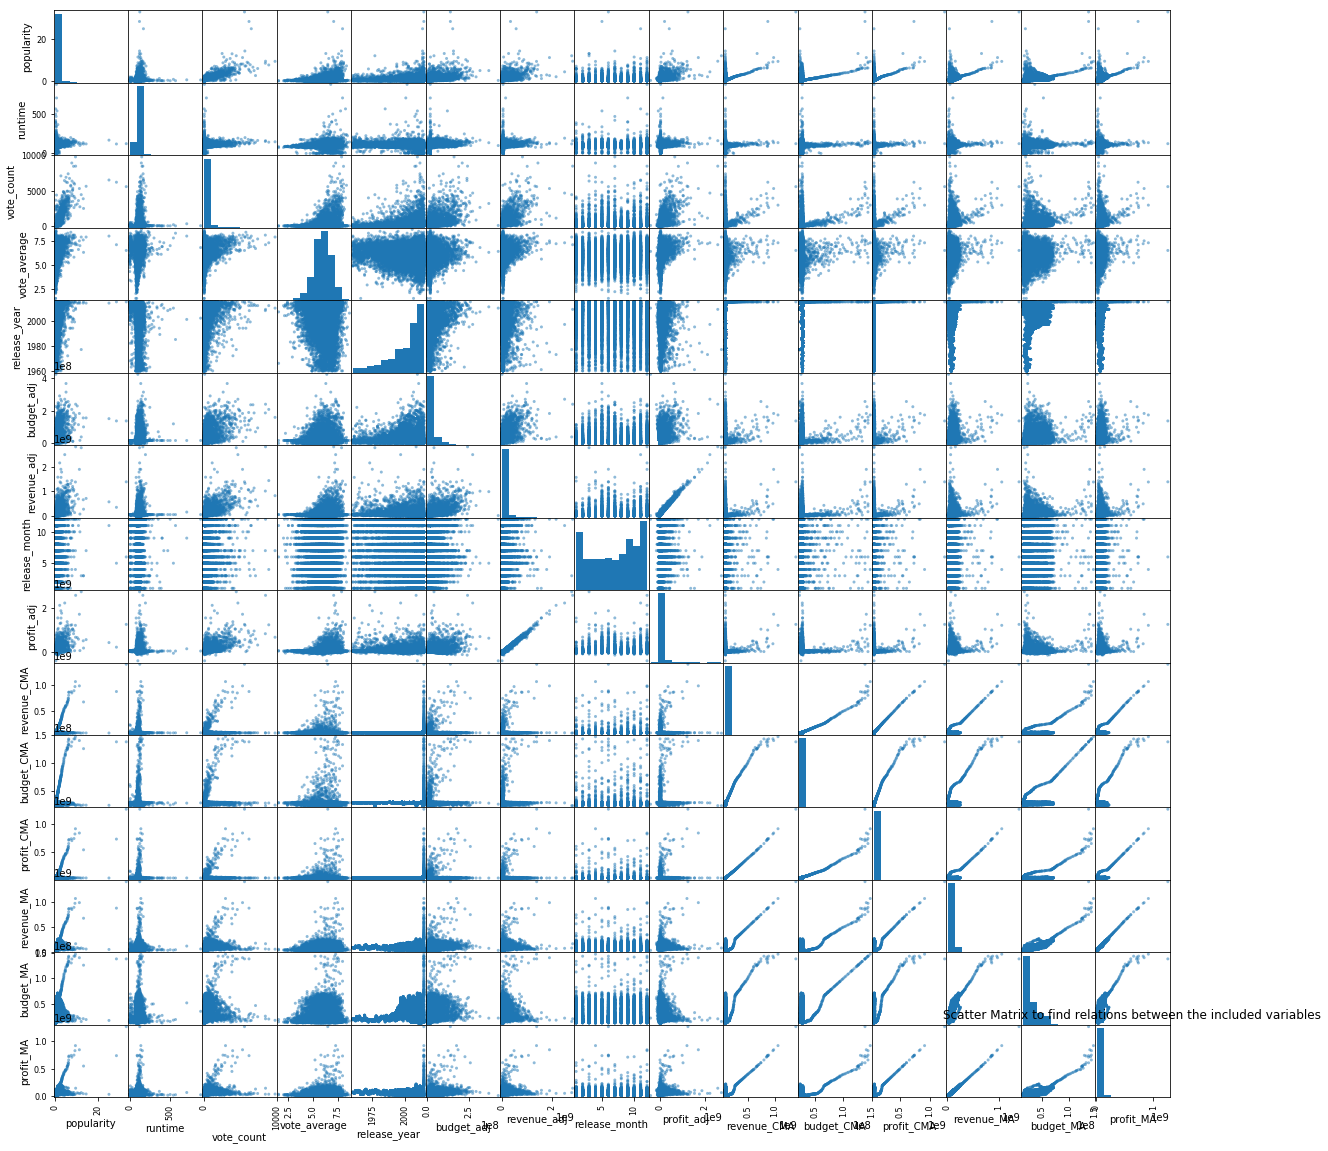

In [23]:
# the scatter matrix gives a ton of information to clarify the questions above and get an overview, before going into more detailed analysis.
pd.plotting.scatter_matrix(df, figsize=(20,20));
plt.title('Scatter Matrix to find relations between the included variables');

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,...,budget_adj,revenue_adj,release_month,profit_adj,revenue_CMA,budget_CMA,profit_CMA,revenue_MA,budget_MA,profit_MA
1386,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,...,240886902,2827123750,12,2586236848,78442450,23098664,55343785,167492995,21344253,146148742


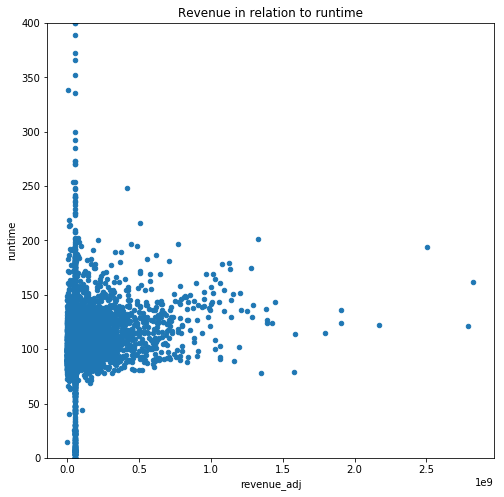

In [24]:
df.plot(x="revenue_adj", y="runtime", kind="scatter", figsize=(8,8), ylim=(0,400));
plt.title('Revenue in relation to runtime')
df[df.revenue_adj == 2827123750]

#### ANSWER RESEARCH QUESTION 3: 
runtime: most revenue with movies around 200min, 170min and 120min with peak revenue at 162min runtime (Avatar.)

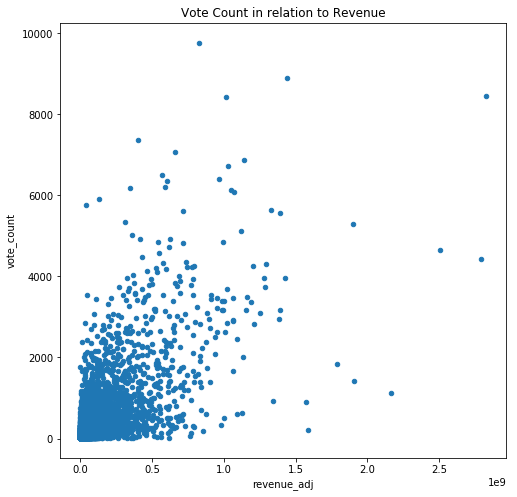

In [25]:
#vote_count
df.plot(x="revenue_adj", y="vote_count", kind="scatter", figsize=(8,8));
plt.title('Vote Count in relation to Revenue');
#no correlation 

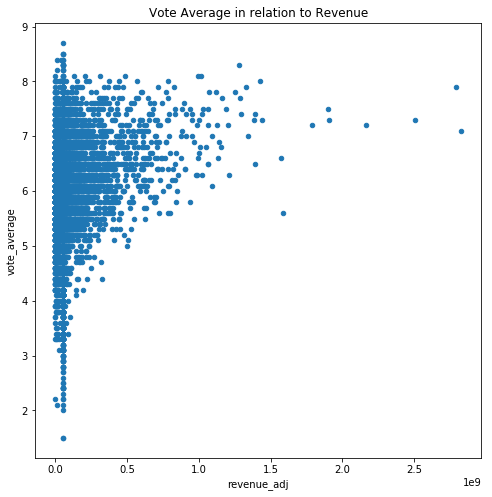

In [26]:
#vote_average
df.plot(x="revenue_adj", y="vote_average", kind="scatter", figsize=(8,8));
plt.title('Vote Average in relation to Revenue');
#the higher the vote_average, the more revenue.

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,...,budget_adj,revenue_adj,release_month,profit_adj,revenue_CMA,budget_CMA,profit_CMA,revenue_MA,budget_MA,profit_MA
1386,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,...,240886902,2827123750,12,2586236848,78442450,23098664,55343785,167492995,21344253,146148742
1329,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,android|galaxy|hermit|death star|lightsaber,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,...,39575591,2789712242,3,2750136651,74120191,23095639,51024551,83089036,16111596,66977440
5231,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,...,271692064,2506405735,11,2234713671,80841045,28071970,52769074,76665093,22667458,53997634
10594,2.010733,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,exorcism|holy water|religion and supernatural|...,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,12/26/73,1113,...,39289276,2167324901,12,2128035625,82949702,28115323,54834378,71514339,18746268,52768071
9806,2.563191,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,fishing|atlantic ocean|bathing|shipwreck|polic...,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,6/18/75,1415,...,28362748,1907005841,6,1878643093,82271545,28578496,53693048,120704742,18866591,101838150
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,...,183999919,1902723129,12,1718723210,978737334,140299938,838437396,978737334,140299938,838437396
8889,2.900556,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,Steven Spielberg,farewell|homesickness|nasa|extraterrestrial te...,115,Science Fiction|Adventure|Family|Fantasy,Universal Pictures|Amblin Entertainment,4/3/82,1830,...,23726245,1791694309,4,1767968064,81800391,28810063,52990328,65688622,24370353,41318269


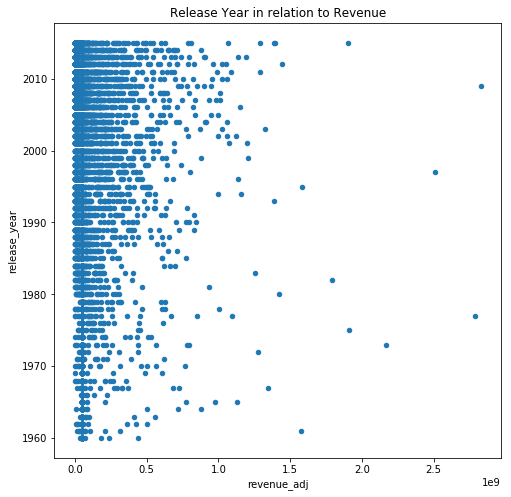

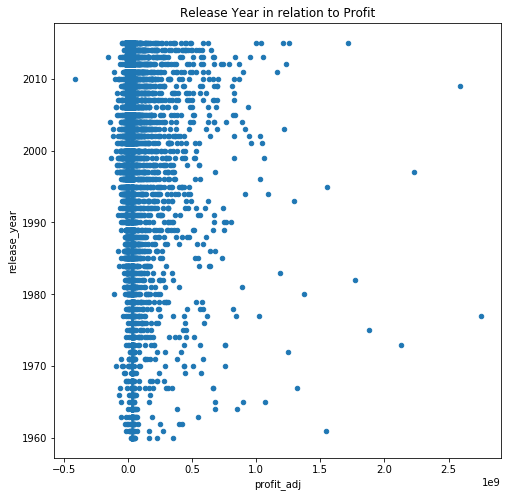

In [27]:
#release_year & RESERACH QUESTION 4: Have older movies in general had better profit margins compared to newer ones?
df.plot(x="revenue_adj", y="release_year", kind="scatter", figsize=(8,8));
plt.title("Release Year in relation to Revenue");
df.plot(x="profit_adj", y="release_year", kind="scatter", figsize=(8,8));
plt.title("Release Year in relation to Profit");
#when looking at the graphs, I need a closer look, so zoom into the x values (cut away the right side --> see next cell)
#here we see, that independent of the release year, some movies brought exceptional revenues and profits. (outliers)
df.nlargest(7, 'revenue_adj') # the 7 outlierswith the highest revenues

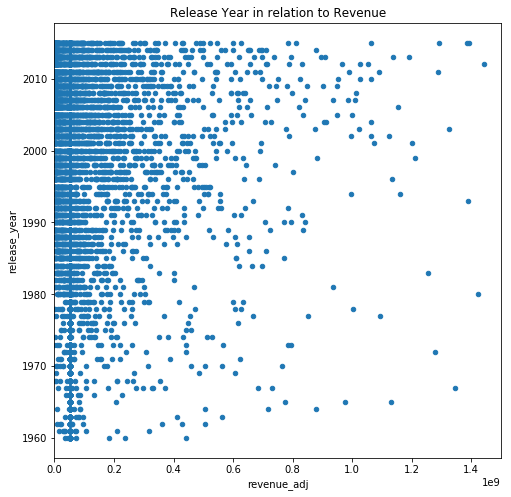

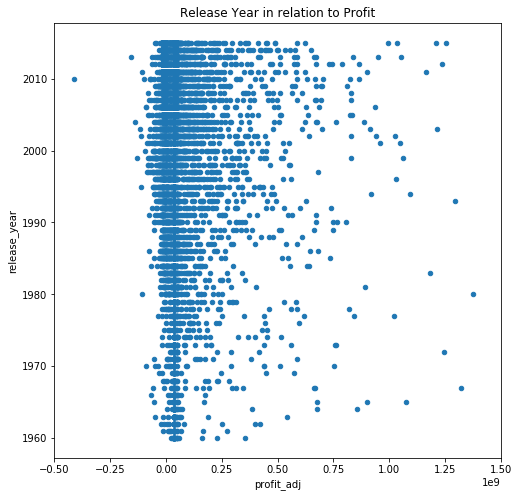

In [28]:
df.plot(x="revenue_adj", y="release_year", kind="scatter", figsize=(8,8), xlim=(0,1.5 * 10**9));
plt.title("Release Year in relation to Revenue");
df.plot(x="profit_adj", y="release_year", kind="scatter", figsize=(8,8), xlim=(-0.5* 10**9,1.5 * 10**9));
plt.title("Release Year in relation to Profit");

#### ANSWERING RESEARCH QUESTION 4:
in the closer look we see an increase in revenue and profits, the "younger" the movies are.

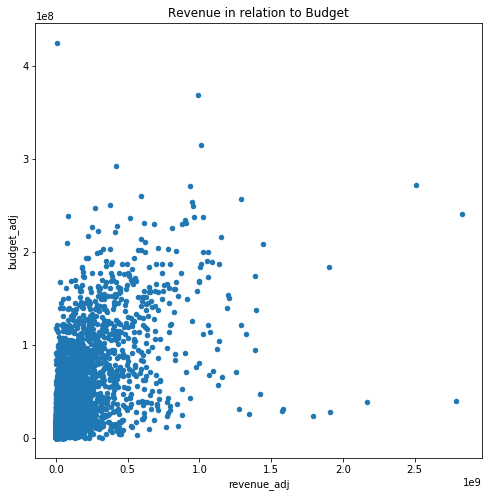

In [29]:
#budget_adj
df.plot(x="revenue_adj", y="budget_adj", kind="scatter", figsize=(8,8));
plt.title("Revenue in relation to Budget");
#no correlation. still, there are some outliers

#df.revenue_adj.max()

In [30]:
# movie with the worst budget to revenue factor
df.nlargest(5, 'budget_adj')
#df[df['budget_adj'] == 425000000]

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,...,budget_adj,revenue_adj,release_month,profit_adj,revenue_CMA,budget_CMA,profit_CMA,revenue_MA,budget_MA,profit_MA
2244,0.250540,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,assassin|small town|revenge|deception|super speed,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,...,425000000,11087569,12,-413912431,78637873,25751895,52885977,36708686,22778406,13930280
3375,4.955130,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,sea|captain|mutiny|sword|prime minister,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/11,3180,...,368371256,990417500,5,622046244,79729188,27631146,52098041,76901567,22648728,54252838
7387,4.965391,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,ocean|drug abuse|exotic island|east india trad...,169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,5/19/07,2626,...,315500574,1010653507,5,695152933,80511072,28618053,51893018,96816990,26062279,70754710
6570,1.957331,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,saving the world|dc comics|invulnerability|seq...,154,Adventure|Fantasy|Action|Science Fiction,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,6/28/06,834,...,292050672,423020463,6,130969791,80843268,28469140,52374128,121587754,34059918,87527835
5231,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,...,271692064,2506405735,11,2234713671,80841045,28071970,52769074,76665093,22667458,53997634


In [31]:
#movie with best budget to revenue factor 
df.nlargest(5, 'revenue_adj')

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,...,budget_adj,revenue_adj,release_month,profit_adj,revenue_CMA,budget_CMA,profit_CMA,revenue_MA,budget_MA,profit_MA
1386,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,...,240886902,2827123750,12,2586236848,78442450,23098664,55343785,167492995,21344253,146148742
1329,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,android|galaxy|hermit|death star|lightsaber,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,...,39575591,2789712242,3,2750136651,74120191,23095639,51024551,83089036,16111596,66977440
5231,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,...,271692064,2506405735,11,2234713671,80841045,28071970,52769074,76665093,22667458,53997634
10594,2.010733,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,exorcism|holy water|religion and supernatural|...,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,12/26/73,1113,...,39289276,2167324901,12,2128035625,82949702,28115323,54834378,71514339,18746268,52768071
9806,2.563191,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,fishing|atlantic ocean|bathing|shipwreck|polic...,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,6/18/75,1415,...,28362748,1907005841,6,1878643093,82271545,28578496,53693048,120704742,18866591,101838150


#### More insights to Research Question 5: 
* movie with highest budget used and lowest revenue in return: The Warrior's Way
* movie with best budget to revenue factor: Star Wars

<a id='Question5'></a>
### Research Question 5.  Which factors influence the popularity of single movies the most?


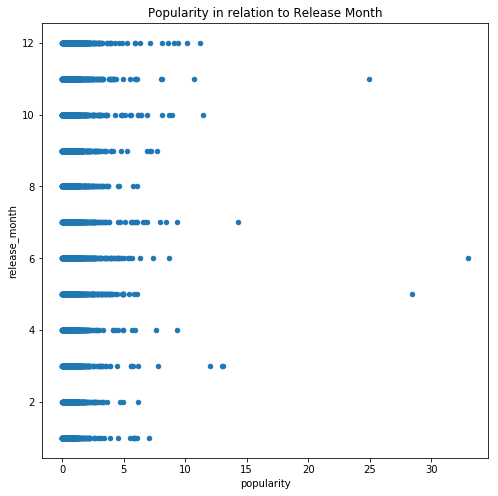

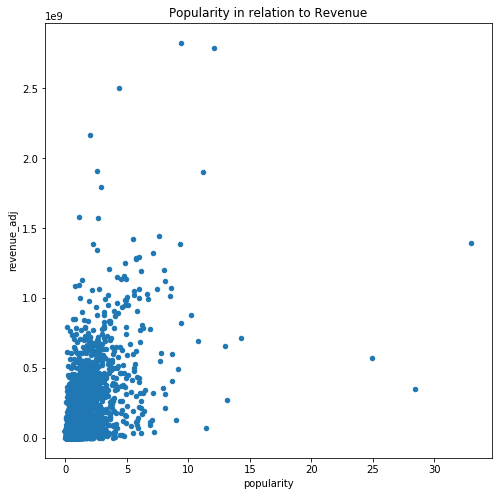

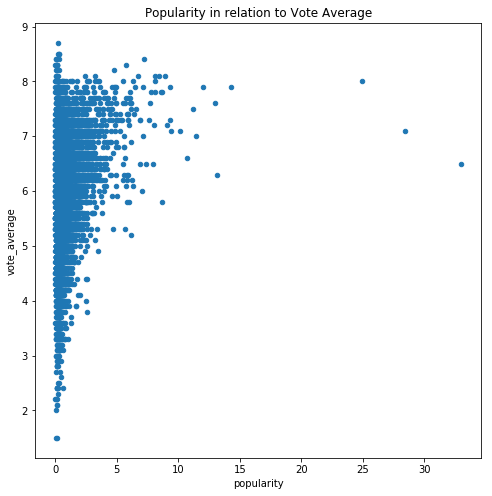

In [32]:
df.plot(x="popularity", y="release_month", kind="scatter", figsize=(8,8));
plt.title("Popularity in relation to Release Month");

df.plot(x="popularity", y="revenue_adj", kind="scatter", figsize=(8,8));
plt.title("Popularity in relation to Revenue");

df.plot(x="popularity", y="vote_average", kind="scatter", figsize=(8,8));
plt.title("Popularity in relation to Vote Average");

#### Answer to RESEARCH QUESTION 5:
* release month: neutral
* revenue_adj: no correlation
* vote_average: positive correlation

<a id='Question6'></a>
### Research Question 6: Within a year, are there a specific months, where movies tend to be more successful? (correlation, yeartime to revenue)

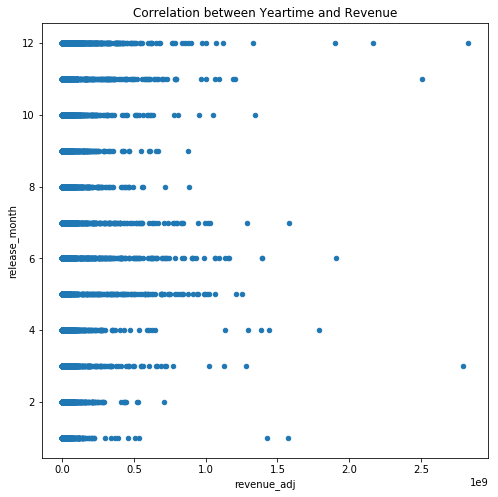

In [33]:
#release month
df.plot(x="revenue_adj", y="release_month", kind="scatter", figsize=(8,8));
plt.title("Correlation between Yeartime and Revenue");

#### Answering RESEARCH QUESTION 6:
* movies released during summer and winter create more revenue compared to movies release in spring and autumn.
* more detailed: good months: october, november, december, march, june, july

<a id='Question7'></a>
### Research Question 7: At which times, most movies are released? (year-wise and month-wise)

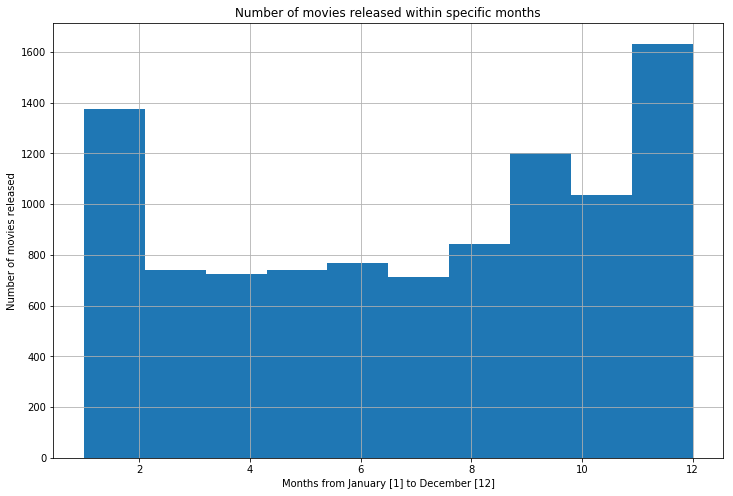

In [34]:
df.release_month.hist(figsize=(12,8));
plt.xlabel('Months from January [1] to December [12]')
plt.ylabel('Number of movies released')
plt.title("Number of movies released within specific months");

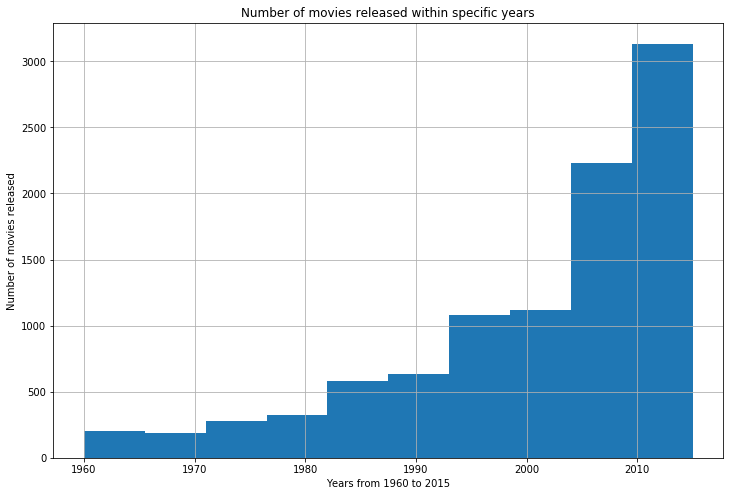

In [35]:
df.release_year.hist(figsize=(12,8));
plt.xlabel('Years from 1960 to 2015')
plt.ylabel('Number of movies released')
plt.title("Number of movies released within specific years");

#### Answering RESEARCH QUESTION 7: At which times, most movies are released?
* monthwise: Beginning and end of the year, most movies are release with the peak in december.
* yearwise: over the years, the number of movies released rose continuously with the biggest increase from 2004 on. another big jump around 2009. 

<a id='conclusions'></a>
## Conclusions

### Analysis Shortcoming & Data Limitations
#### Data Limitations: <br>
The betrayed dataset originally included 10866 rows over 21 columns. First of all, 7 of the 21 columns where deleted - which is 1/3 of the available columns and therefor quite a lot - because they added no useful information to the dataset for my research questions. When using different questions (e.g. correlation between tagline and popularity), some of those columns would have been more useful. <br>
The biggest fallback in data quality was the high number of missing values, especially NaNs in the Cast and other columns. Compared to numerical values, where a mean fill was used to at least fill the gaps, those categorical values where much harder to fill. A possible solution to enhance the number of samples would have been to A) manually search for the respective cast to the movies without respective values or B) write a small text crawler that searches the internet and finds related cast or taglines etc. For the case of my analysis, this would have been beyond the scope. This reduced the number of samples from 10866 down to 9772.  <br>
Anyway, with a use of nearly 90% of available rows, the number of samples still is a good representative of the population.<br><br>  

#### Analysis Shortcomings:
As correlation does not always include causation, an usage of statistical methods like regression testing would have brought more insights about the data. Unfortunately, due to limited skills, those methods haven't been used (yet). <br>
In some cases, also the comparison of more than 2 variables simultaneously would have brought better insights (solver). E.g. "Does the number of vote counts and vote average together implies higher revenue or is it mainly depending on one of the two?"<br>
The adding of statistical methods - which will be included in the next chapter - will increase the analysis quality. I'm already looking forward to digging deeper into this topic :-)


#### Here, a summary of questions ans answers will be given. The detailed explorations can be found above and answers are also commented directly within the code.

#### 1.  Which movies & genres are most popular from year to year?
Here we see, which genres have been most popular each year:
<li><a href="#Question1">Insights Question 1</a></li>

#### 2.  How did the costs, revenues and profits (inflation adjusted) changed over the years?

* Revenue: revenues spread was higher in earlier days - probably because the whole industry was not as big in those days and outliers in over or underperformance were more often to occur.
* Budget: movie-budgets increase around 1995 with its peak in 1997 with a mean of 42096421 dollars This is mainly through the movie StarWars.
* Profit: between 1960 and 1978, profits have been higher on average compared to the time after 1978 with its peak in 1977 with 152090423 dollars mean.
* Overall: # in ~2002 we see a strong decrese in revenue, budget and also profit, which could be correlated to 911 and the fear of people going into crowded places like cinemas.
<li><a href="#Question2">Visuals Question 2</a></li>

#### 3.  What kinds of properties are associated with movies that have high revenues?
<li><a href="#Question3and4">Insights Question 3 and 4</a></li>

#### 4.  Have older movies in general had better profit margins compared to newer ones?
<li><a href="#Question3and4">Insights Question 3 and 4</a></li>

#### 5.  Which factors influence the popularity of single movies the most? 
<li><a href="#Question5">Insights Question 5</a></li>

#### 6. Within a year, are there a specific months, where movies tend to be more successfull? (correlation, yeartime to revenue)
<li><a href="#Question6">Visuals and Insights Question 6</a></li>

#### 7. At which times, most movies are released? (year-wise and month-wise)
<li><a href="#Question7">Visuals and Insights Question 7</a></li>


##  Question for the reviewer
 

> **_For question 2:_**<br>

"What other methods for smoothing out the line-graph exist? I did not find a good fit for my data. This is why I ended up working with the un-smoothed graphs in the end. Are there any better ways?"

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0